In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

%matplotlib inline
%load_ext autoreload
%autoreload 2
warnings.filterwarnings("ignore")

from utils import quick_load_liuzhong_health_check_data, _get_fc_pvalue_tag
from plot_utils import Stack, Scatter, Sankey, BxxPvalue

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_group, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/figures"

## CBC overview

100%|███████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  6.53it/s]


len                                                  mean  \
month            1     2     3     4     5     6    11    12           1   
period                                                                     
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    4.628442   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    4.613636   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    4.565163   
Control-2021  1721  4017  3278  3072  4319  4052  2276  1029  246.240170   
Control-2022  1715  4028  3278  3068  4326  4059  2260  1025  249.590379   
Test-2023     1715  4016  3267  3065  4323  4062  2244  1027  254.409913   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    5.940110   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    6.040090   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    6.073325   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029  138.036316   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025  137.772886   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027  135.434441   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029   41.662222   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025   41.605481   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027   41.341492   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029   90.223329   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025   90.393965   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027   90.767133   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029   29.884709   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025   29.928659   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027   29.738578   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029  331.014914   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025  330.883673   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027  327.414627   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029   12.630796   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025   12.627668   
Test-2023     1716  4016  3268  3067  4325  4063  2244  1027   12.933596   
Control-2021  1708  3978  3251  3055  4285  4014  2258  1023   10.814666   
Control-2022  1699  3997  3253  3052  4307  4041  2246  1022   10.791642   
Test-2023     1701  3988  3244  3053  4308  4045  2234  1024   10.519518   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    3.331615   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    3.273248   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    3.378805   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    2.045881   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    2.186650   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    2.121786   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    0.407321   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    0.416362   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    0.411393   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    0.034339   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    0.033860   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    0.031402   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    0.121570   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    0.129764   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    0.129942   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029   55.196543   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025   53.527959   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027   55.005711   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029   35.190509   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025   

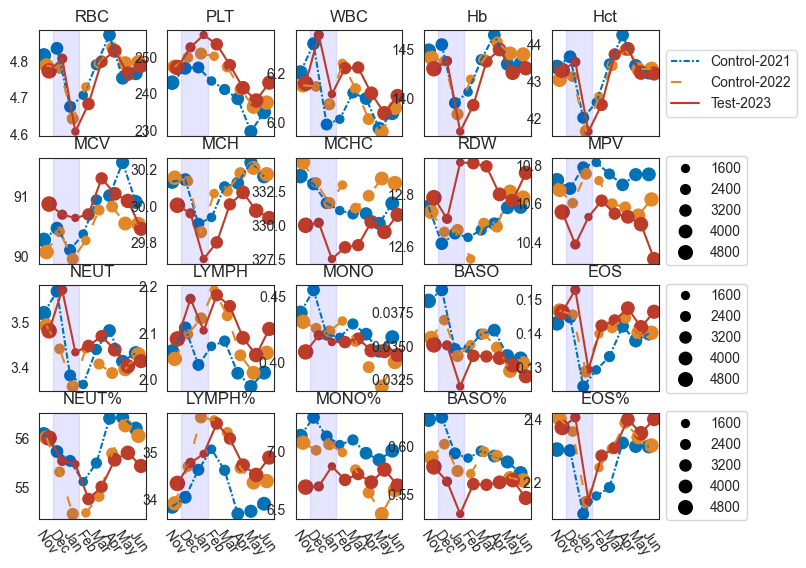

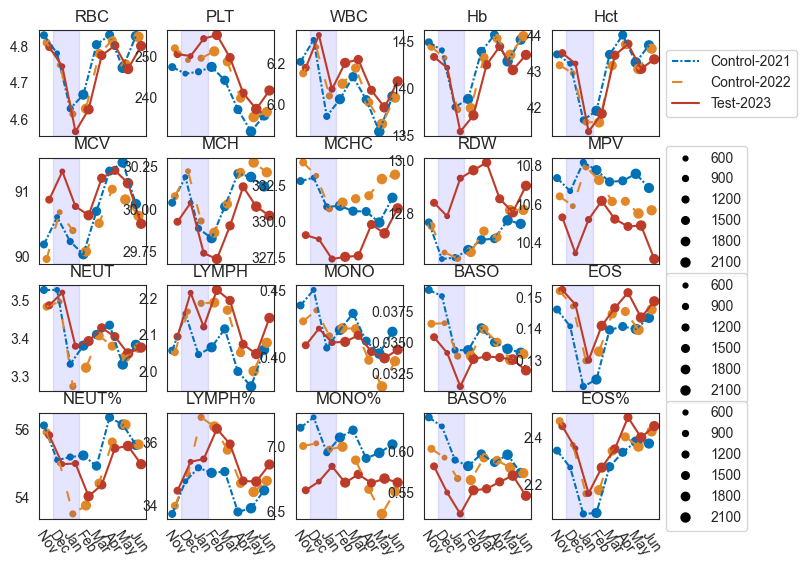

In [2]:
l_tags = list(df_meta_group[df_meta_group["combined_item_name_en"]=="CBC"]["item_id"])
l_tags = [
    'v9057','v9064','v9045','v9058','v9059',
    'v9060','v9061','v9062','v9063','v9065',
    'v9051','v9055','v9089','v9091','v9090',
    'v9046','v9047','v9048','v9049','v9050',
]
l_months = [11,12,1,2,3,4,5,6]

plt_scatter = Scatter(n_cols=5, figsize=(8,8), n_rows=5, rename_dict=rename_dict)
fig, df_res_all = plt_scatter.plot_scatter(df_table1plus, l_tags, order=l_months)
fig.savefig(f"{workdir}/Figure2_A.pdf")

plt_scatter = Scatter(n_cols=5, figsize=(8,8), n_rows=5, rename_dict=rename_dict)
fig, df_res = plt_scatter.plot_scatter(df_table1plus_3p_revMM, l_tags, order=l_months)
fig.savefig(f"{workdir}/.Figure2_A-3y.pdf")
df_res

## Scatter for different ages

RDW


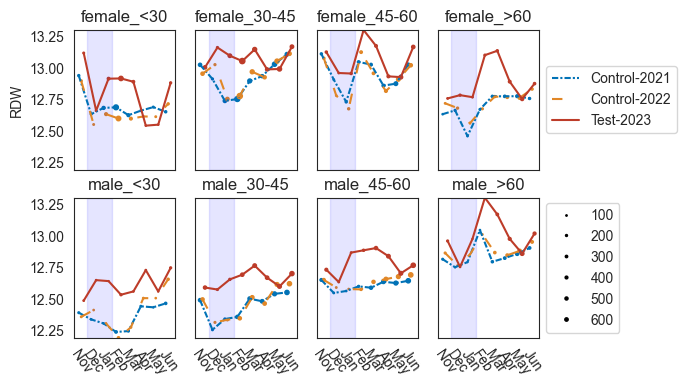

In [3]:
tag = l_tags[8]
print(rename_dict[tag])
plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)
fig.show()
fig.savefig(f"{workdir}/.FigureS3_A-3y.pdf")

RDW


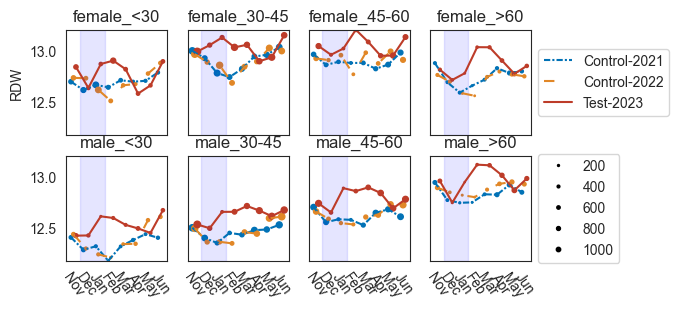

In [4]:
tag = l_tags[8]
print(rename_dict[tag])
plt_scatter = Scatter(figsize=(6,3), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus, tag, order=l_months)
fig.show()
fig.savefig(f"{workdir}/FigureS3_A.pdf")

Hb


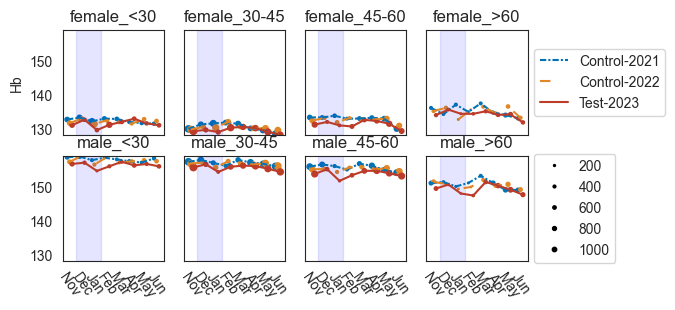

In [5]:
tag = "v9058" #HB
print(rename_dict[tag])
plt_scatter = Scatter(figsize=(6,3), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus, tag, order=l_months)
fig.show()
fig.savefig(f"{workdir}/FigureS3_B.pdf")

PLT


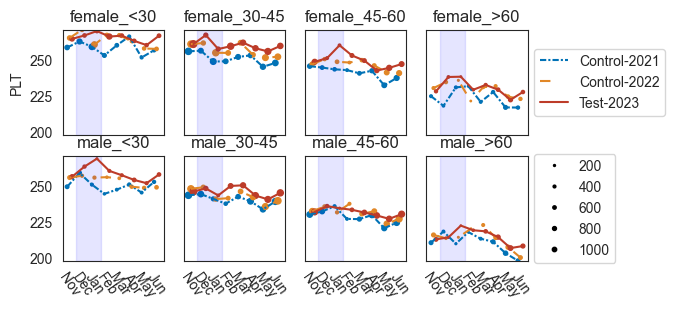

In [6]:
tag = "v9064" #PLT
print(rename_dict[tag])
plt_scatter = Scatter(figsize=(6,3), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus, tag, order=l_months)
fig.show()
fig.savefig(f"{workdir}/FigureS3_C.pdf")

MPV


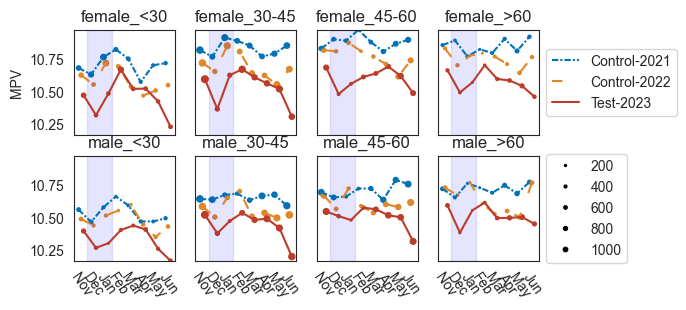

In [7]:
tag = "v9065" # MPV
print(rename_dict[tag])
plt_scatter = Scatter(figsize=(6,3), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus, tag, order=l_months)
fig.show()
fig.savefig(f"{workdir}/FigureS3_D.pdf")

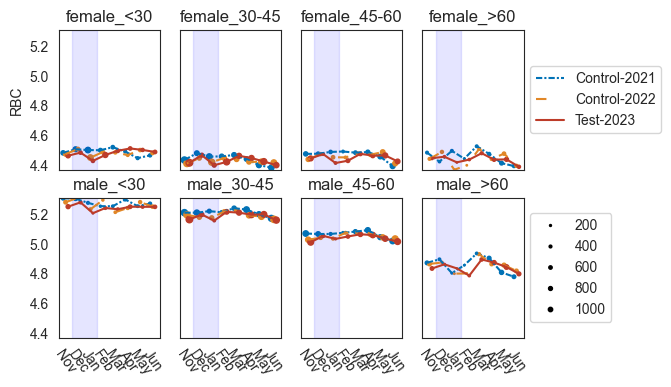

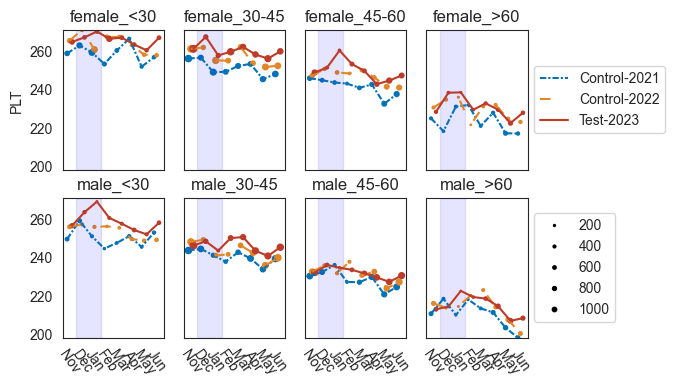

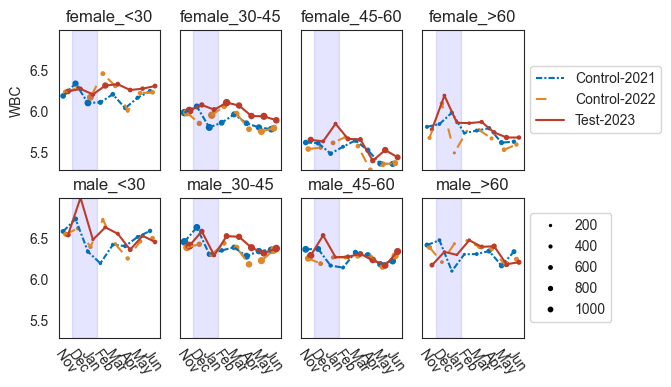

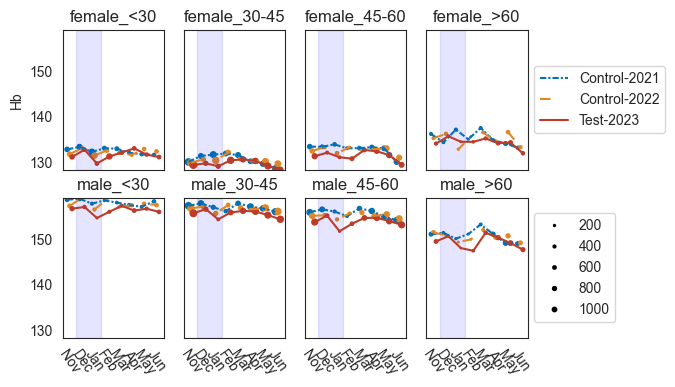

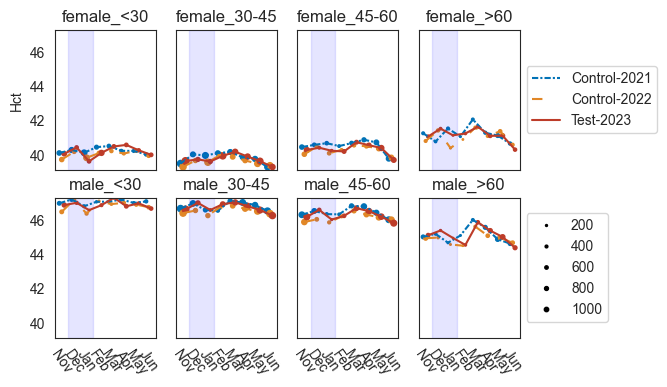

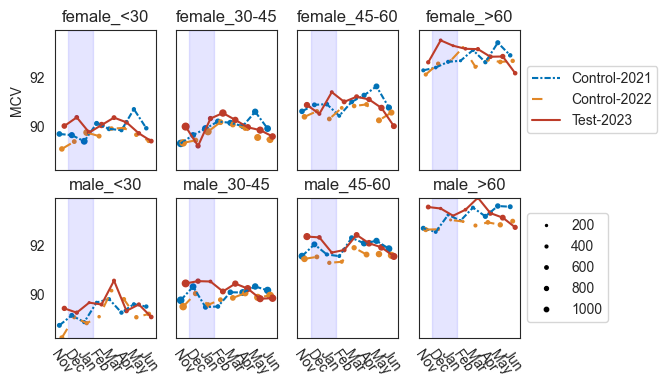

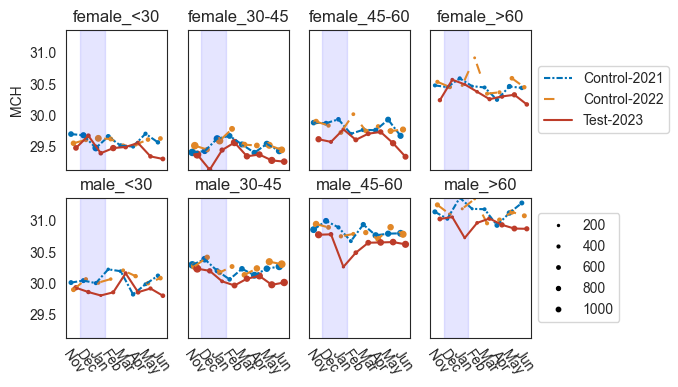

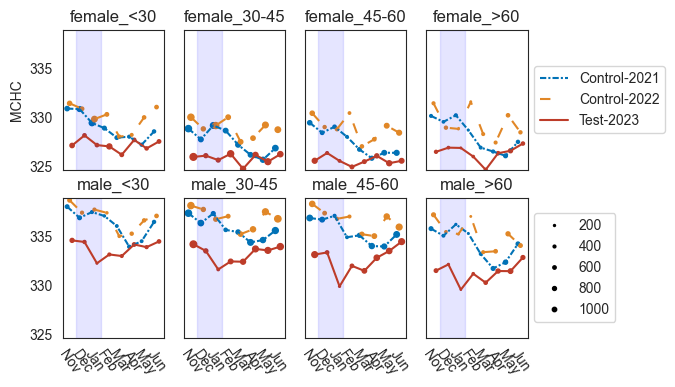

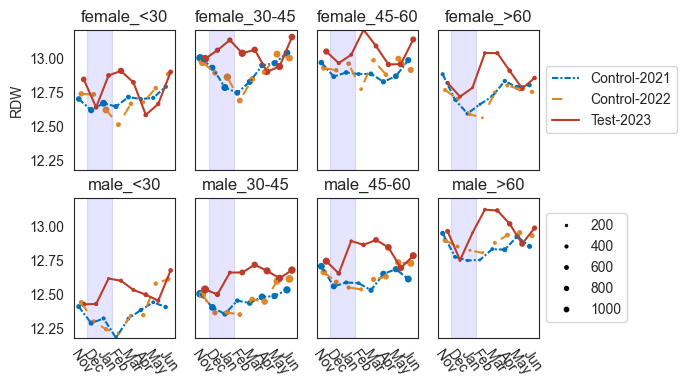

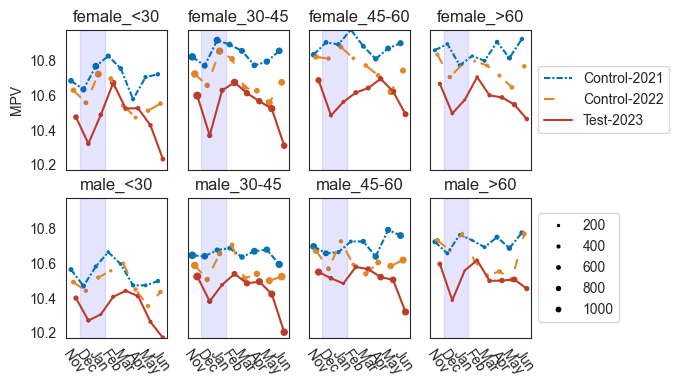

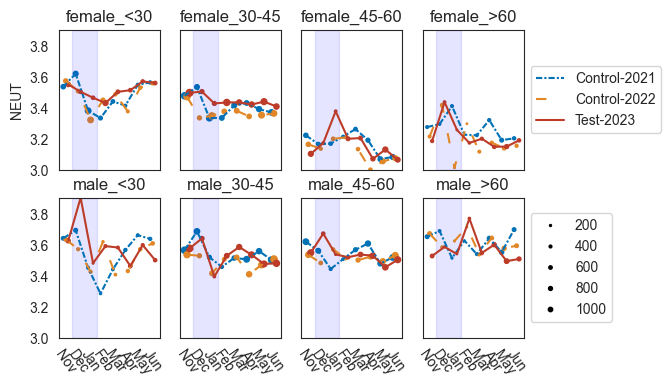

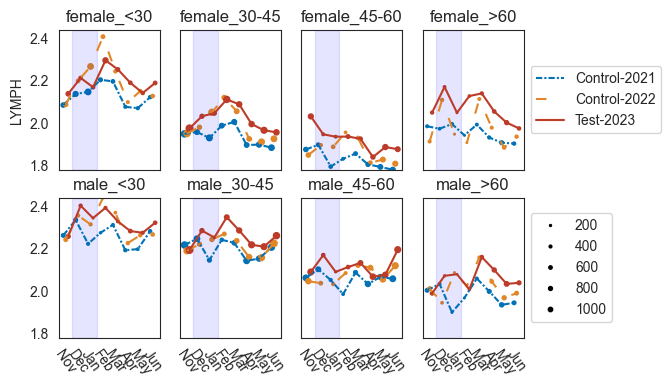

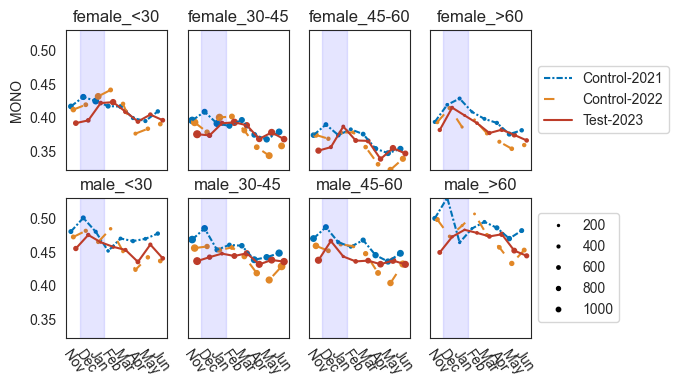

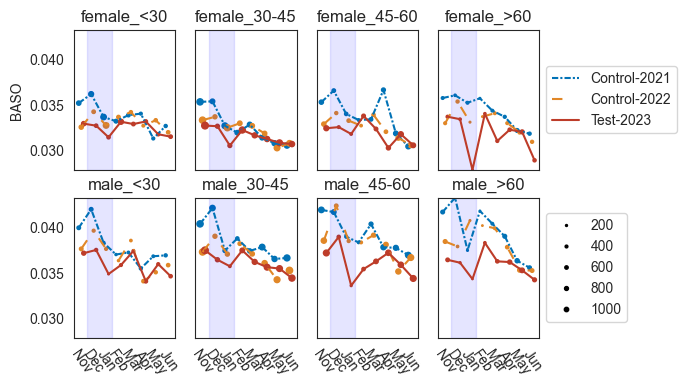

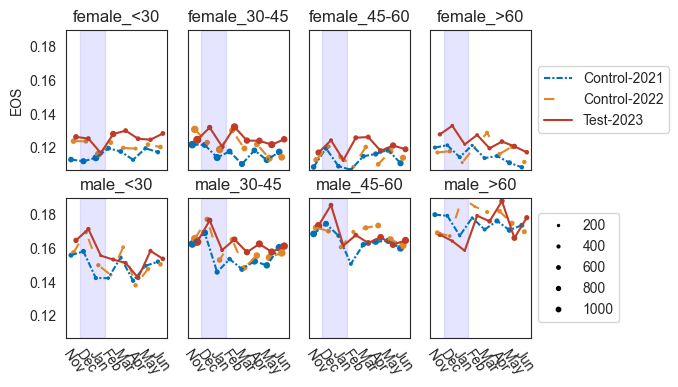

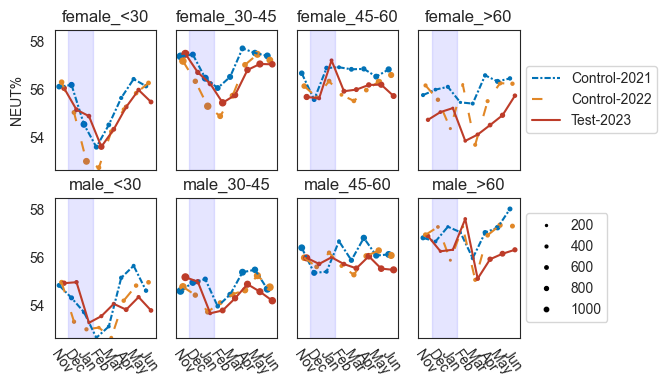

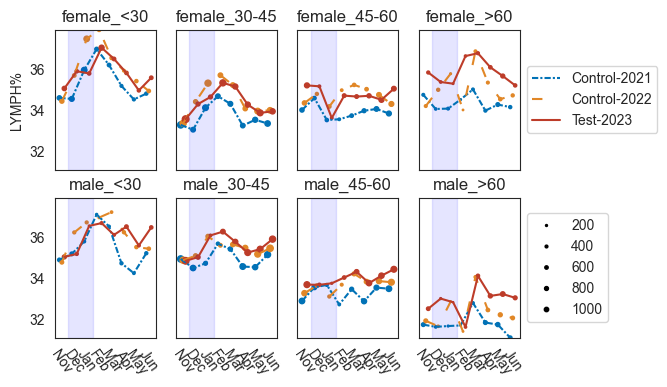

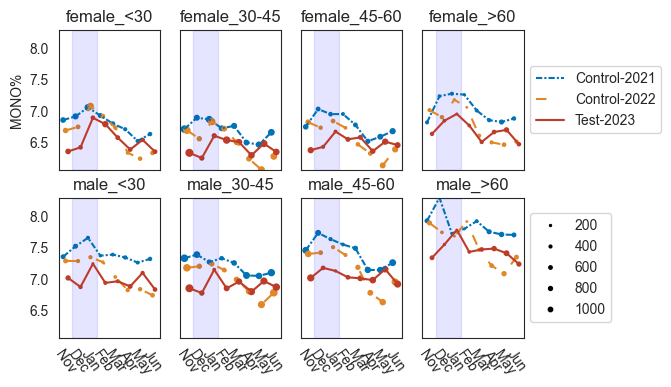

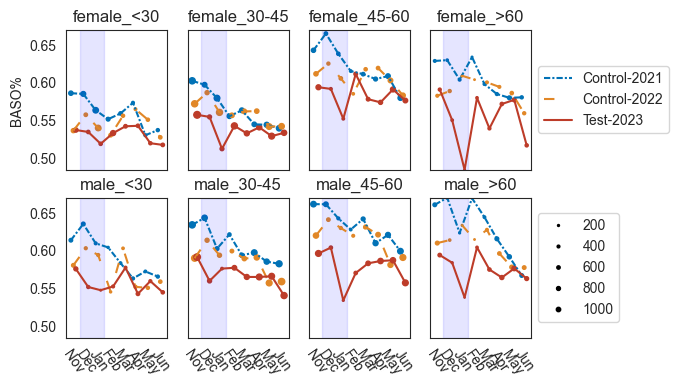

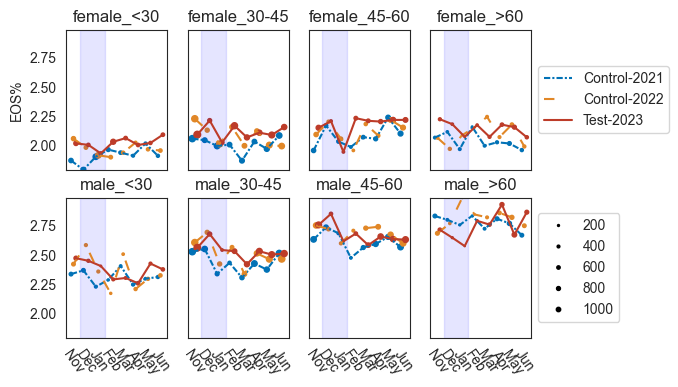

In [8]:
l_tags = [
    'v9057','v9064','v9045','v9058','v9059',
    'v9060','v9061','v9062','v9063','v9065',
    'v9051','v9055','v9089','v9091','v9090',
    'v9046','v9047','v9048','v9049','v9050',
]
for tag in l_tags:
    plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
    fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus, tag, order=l_months)
    fig.show()

## boxplot_pvalue for RDW

In [9]:
df_table1plus

variable    birthday  year  month  day  gender  \
0         1935-08-25  2021     12   24    male   
1         1935-09-27  2023      2   14  female   
2         1935-12-01  2021      6    8    male   
3         1936-04-03  2022     10    7  female   
4         1936-10-30  2021      2    5  female   
...              ...   ...    ...  ...     ...   
235676    2001-07-13  2023      6   28  female   
235677    2001-07-31  2023      4   16  female   
235678    2001-08-22  2023      1    8    male   
235679    2001-12-09  2020     11   14    male   
235680    2002-03-27  2022      6   28  female   

variable                                         sample_id  v000760  v000761  \
0         Da4TKCKNjTfO2CE73cGmYsytDz5zY9ZxX1C5OdZIUwx3vQ==    157.2     63.8   
1         3LMkuxkqQtefLsMjWJ+T/cytDz5zZdZxX1C5ONZKUwh0vA==    152.0     52.5   
2         5KGUOjagf2QfVhHEPAiW+cytDz5zZ9ZxX1C4M9RMUg53vA==    156.9     67.5   
3         V/Lh31LCtw8A+AOXAwk4aMytDz5zZdZxX1O5NdROUwhyvQ==    146.9     54.1   
4         CqpgapqSPchK77fFqauqSsytDz5zY9ZxX1O4MddNUgdy1g==    150.0     56.8   
...                                                    ...      ...      ...   
235676    cs57W5NzI8055fwwuSj45MytDj97Y9V4XFS5NtVOUg50vQ==    167.0     55.5   
235677    BNy7GDFnsbqEqur6IFWXpMytDzdxYNV4XFS5NtdMUg50ug==    166.7     55.5   
235678    e3B0iY01lpqx3/lR3fAU2cyqDjlxYNV4XFS5OdZPUAd3uQ==    180.5     58.5   
235679    O6Bv8vNp46iIN/C0LFPDSsyoDTxxZ9V4XFS4M9REUQd3tw==    178.5     58.9   
235680    3qhAmEr7g56VYUQkEjYxVMyoDj5xYNV4XFe5MtZKUA90uA==      NaN      NaN   

variable  v002266  v000763  ...  v0015  v0016  v0027  v0026  v0032  age  \
0             NaN     84.0  ...  23.10    9.3  13.80    NaN  129.0   86   
1             NaN     71.0  ...   7.60    2.8   4.80    4.0   84.0   88   
2             NaN     64.0  ...   7.80    4.1   3.70   11.7   93.0   86   
3             NaN     94.0  ...   7.90    3.1   4.80    NaN   65.0   86   
4             NaN     73.0  ...   8.70    3.0   5.70    NaN   71.0   85   
...           ...      ...  ...    ...    ...    ...    ...    ...  ...   
235676        NaN     74.0  ...  19.30    6.4  12.90    3.8   58.0   22   
235677        NaN    121.0  ...  12.60    4.7   7.90    2.3   77.0   22   
235678        NaN     91.0  ...  38.85   12.2  26.65    5.9   83.0   22   
235679        NaN     81.0  ...  30.90    9.4  21.50    4.7   68.0   19   
235680        NaN      NaN  ...   7.70    3.5   4.20    NaN   63.0   20   

variable  year-month  age_groups        period        period_age  
0            2021-12         >60  Control-2022  Control-2022_>60  
1            2023-02         >60     Test-2023     Test-2023_>60  
2            2021-06         >60  Control-2021  Control-2021_>60  
3            2022-10         >60  Control-2022  Control-2022_>60  
4            2021-02         >60  Control-2021  Control-2021_>60  
...              ...         ...           ...               ...  
235676       2023-06         <30     Test-2023     Test-2023_<30  
235677       2023-04         <30     Test-2023     Test-2023_<30  
235678       2023-01         <30     Test-2023     Test-2023_<30  
235679       2020-11         <30  Control-2021  Control-2021_<30  
235680       2022-06         <30  Control-2022  Control-2022_<30  

[235681 rows x 84 columns]

## Descriptions for foldchange and pvalue

### RDW

In [10]:
_get_fc_pvalue_tag(tag = "v9063")

RDW
month 1, 2023 vs 2022, fold change 1.02, p=3.59e-20, n=2480, 5980
month 1, 2022 vs 2021, fold change 1.00, p=5.26e-01, n=5980, 5809
month 2, 2023 vs 2022, fold change 1.03, p=3.74e-61, n=6446, 3432
month 2, 2022 vs 2021, fold change 0.99, p=1.07e-03, n=3432, 3445
month 3, 2023 vs 2022, fold change 1.02, p=4.88e-27, n=6242, 4880
month 3, 2022 vs 2021, fold change 1.00, p=2.25e-01, n=4880, 5035
month 4, 2023 vs 2022, fold change 1.01, p=1.21e-13, n=8013, 5736
month 4, 2022 vs 2021, fold change 1.00, p=5.53e-01, n=5736, 6710
month 5, 2023 vs 2022, fold change 1.00, p=2.49e-02, n=8944, 8147
month 5, 2022 vs 2021, fold change 1.00, p=2.51e-04, n=8147, 7218


### PLT

In [11]:
_get_fc_pvalue_tag(tag = "v9064")

PLT
month 1, 2023 vs 2022, fold change 1.02, p=3.68e-04, n=2479, 5980
month 1, 2022 vs 2021, fold change 1.02, p=3.30e-04, n=5980, 5807
month 2, 2023 vs 2022, fold change 1.01, p=7.52e-03, n=6447, 3432
month 2, 2022 vs 2021, fold change 1.03, p=9.39e-07, n=3432, 3445
month 3, 2023 vs 2022, fold change 1.00, p=6.56e-01, n=6239, 4880
month 3, 2022 vs 2021, fold change 1.03, p=1.92e-07, n=4880, 5034
month 4, 2023 vs 2022, fold change 1.00, p=7.09e-01, n=8011, 5736
month 4, 2022 vs 2021, fold change 1.01, p=1.37e-02, n=5736, 6709
month 5, 2023 vs 2022, fold change 1.01, p=4.82e-02, n=8941, 8146
month 5, 2022 vs 2021, fold change 1.03, p=4.68e-13, n=8146, 7216


### HB

In [12]:
_get_fc_pvalue_tag(tag = "v9058")

Hb
month 1, 2023 vs 2022, fold change 0.99, p=1.08e-06, n=2480, 5980
month 1, 2022 vs 2021, fold change 0.99, p=4.29e-05, n=5980, 5809
month 2, 2023 vs 2022, fold change 0.98, p=3.40e-16, n=6448, 3432
month 2, 2022 vs 2021, fold change 1.01, p=5.13e-04, n=3432, 3444
month 3, 2023 vs 2022, fold change 1.00, p=5.15e-01, n=6242, 4880
month 3, 2022 vs 2021, fold change 1.00, p=9.54e-01, n=4880, 5035
month 4, 2023 vs 2022, fold change 0.99, p=6.02e-03, n=8013, 5736
month 4, 2022 vs 2021, fold change 0.99, p=9.08e-03, n=5736, 6710
month 5, 2023 vs 2022, fold change 0.99, p=3.18e-16, n=8945, 8147
month 5, 2022 vs 2021, fold change 1.01, p=2.15e-05, n=8147, 7218


### MPV

In [13]:
_get_fc_pvalue_tag(tag = "v9065")

MPV
month 1, 2023 vs 2022, fold change 0.98, p=2.31e-20, n=2460, 5912
month 1, 2022 vs 2021, fold change 1.00, p=6.31e-02, n=5912, 5759
month 2, 2023 vs 2022, fold change 0.99, p=1.39e-06, n=6398, 3403
month 2, 2022 vs 2021, fold change 0.99, p=7.98e-05, n=3403, 3418
month 3, 2023 vs 2022, fold change 1.00, p=1.01e-02, n=6203, 4848
month 3, 2022 vs 2021, fold change 0.99, p=6.05e-14, n=4848, 4977
month 4, 2023 vs 2022, fold change 1.00, p=5.29e-03, n=7969, 5701
month 4, 2022 vs 2021, fold change 0.99, p=1.36e-10, n=5701, 6653
month 5, 2023 vs 2022, fold change 1.00, p=3.93e-03, n=8897, 8111
month 5, 2022 vs 2021, fold change 0.98, p=2.36e-36, n=8111, 7159


### FT4

In [14]:
_get_fc_pvalue_tag(tag = "v9462", m_end=13)

FT4
month 1, 2023 vs 2022, fold change 1.02, p=1.24e-03, n=586, 1579
month 1, 2022 vs 2021, fold change 0.99, p=4.31e-03, n=1579, 3170
month 2, 2023 vs 2022, fold change 1.01, p=2.91e-03, n=1952, 1097
month 2, 2022 vs 2021, fold change 1.02, p=9.14e-07, n=1097, 2068
month 3, 2023 vs 2022, fold change 1.04, p=7.11e-13, n=2308, 1386
month 3, 2022 vs 2021, fold change 1.01, p=1.59e-03, n=1386, 1927
month 4, 2023 vs 2022, fold change 1.04, p=6.83e-40, n=3983, 2844
month 4, 2022 vs 2021, fold change 0.97, p=2.33e-14, n=2844, 3244
month 5, 2023 vs 2022, fold change 1.01, p=3.89e-04, n=4572, 4082
month 5, 2022 vs 2021, fold change 0.98, p=1.30e-12, n=4082, 4231
month 6, 2023 vs 2022, fold change 1.03, p=3.49e-39, n=4908, 4813
month 6, 2022 vs 2021, fold change 1.01, p=1.19e-02, n=4813, 4483
month 7, 2023 vs 2022, fold change nan, p=nan, n=0, 4942
month 7, 2022 vs 2021, fold change 0.99, p=1.78e-03, n=4942, 4132
month 8, 2023 vs 2022, fold change nan, p=nan, n=0, 6014
month 8, 2022 vs 2021, fo

### T4

In [15]:
_get_fc_pvalue_tag(tag = "v0955", m_end=13)

T4
month 1, 2023 vs 2022, fold change 1.04, p=9.91e-10, n=991, 3126
month 1, 2022 vs 2021, fold change 0.98, p=3.88e-09, n=3126, 4265
month 2, 2023 vs 2022, fold change 0.98, p=2.52e-03, n=3048, 2071
month 2, 2022 vs 2021, fold change 1.00, p=8.62e-01, n=2071, 2624
month 3, 2023 vs 2022, fold change 0.98, p=1.21e-03, n=3151, 1979
month 3, 2022 vs 2021, fold change 0.98, p=2.27e-05, n=1979, 2578
month 4, 2023 vs 2022, fold change 1.02, p=5.49e-08, n=5915, 4422
month 4, 2022 vs 2021, fold change 0.98, p=1.03e-11, n=4422, 5000
month 5, 2023 vs 2022, fold change 1.03, p=6.70e-19, n=6237, 6039
month 5, 2022 vs 2021, fold change 0.98, p=3.79e-08, n=6039, 5549
month 6, 2023 vs 2022, fold change 1.03, p=1.28e-17, n=6113, 6437
month 6, 2022 vs 2021, fold change 0.98, p=2.08e-11, n=6437, 5723
month 7, 2023 vs 2022, fold change nan, p=nan, n=0, 5903
month 7, 2022 vs 2021, fold change 0.99, p=1.49e-04, n=5903, 5724
month 8, 2023 vs 2022, fold change nan, p=nan, n=0, 7387
month 8, 2022 vs 2021, fol

In [16]:
_get_fc_pvalue_tag(tag = "v9453", m_end=13)

T3
month 1, 2023 vs 2022, fold change 1.11, p=4.30e-60, n=991, 3126
month 1, 2022 vs 2021, fold change 1.01, p=1.26e-01, n=3126, 862
month 2, 2023 vs 2022, fold change 1.04, p=4.66e-15, n=3048, 2071
month 2, 2022 vs 2021, fold change 0.99, p=5.57e-01, n=2071, 112
month 3, 2023 vs 2022, fold change 1.04, p=1.08e-11, n=3151, 1979
month 3, 2022 vs 2021, fold change 0.98, p=1.85e-01, n=1979, 317
month 4, 2023 vs 2022, fold change 1.00, p=5.94e-01, n=5915, 4422
month 4, 2022 vs 2021, fold change 0.96, p=6.77e-06, n=4422, 413
month 5, 2023 vs 2022, fold change 0.97, p=4.18e-15, n=6237, 6039
month 5, 2022 vs 2021, fold change 0.99, p=2.94e-01, n=6039, 809
month 6, 2023 vs 2022, fold change 1.01, p=2.05e-02, n=6113, 6437
month 6, 2022 vs 2021, fold change 1.00, p=4.36e-01, n=6437, 1091
month 7, 2023 vs 2022, fold change nan, p=nan, n=0, 5903
month 7, 2022 vs 2021, fold change 1.00, p=6.77e-01, n=5903, 1092
month 8, 2023 vs 2022, fold change nan, p=nan, n=0, 7388
month 8, 2022 vs 2021, fold cha

item_id  gender age_group  month     period    n  fold_change   log10_p
0    v9063  female       <30     11  2021-2022  182     0.996791  0.106324
1    v9063  female       <30     11  2022-2023  142     1.017138  0.762194
2    v9063  female     30-45     11  2021-2022  539     0.994584  0.380989
3    v9063  female     30-45     11  2022-2023  544     1.003890  0.267412
4    v9063  female     45-60     11  2021-2022  227     0.997353  0.097069
..     ...     ...       ...    ...        ...  ...          ...       ...
59   v9063    male     30-45      6  2022-2023  891     1.006369  1.442058
60   v9063    male     45-60      6  2021-2022  940     1.003702  0.818321
61   v9063    male     45-60      6  2022-2023  934     1.006031  1.885420
62   v9063    male       >60      6  2021-2022  304     1.003728  0.282063
63   v9063    male       >60      6  2022-2023  339     1.005147  0.453967

[128 rows x 8 columns]

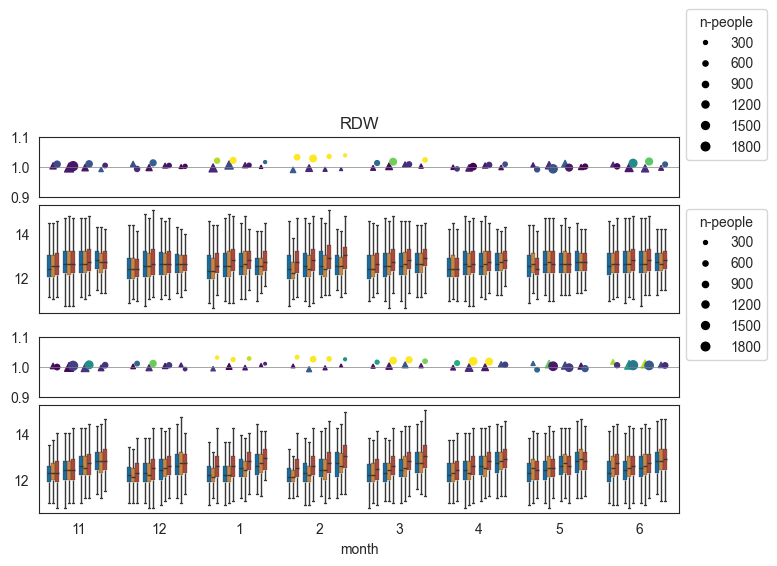

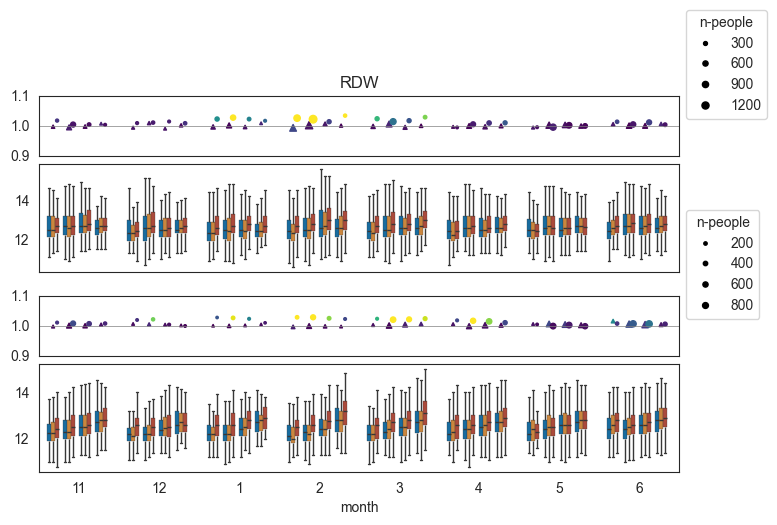

In [17]:
plot_box = BxxPvalue(figsize=(8,4), rename_dict=rename_dict)
tag = "v9063"
fig, df_res = plot_box.plot_bxxplot_pvalue(df_table1plus, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="boxplot"
)
fig.savefig(f"{workdir}/Figure2_B.pdf")


fig, df_res = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="boxplot"
)
fig.savefig(f"{workdir}/.Figure2_B-3y.pdf")
df_res

## Other plots

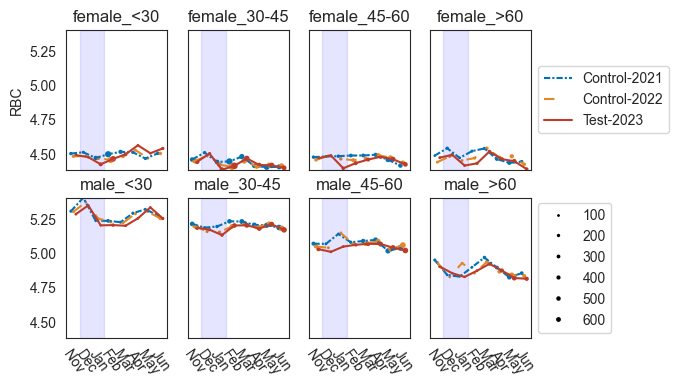

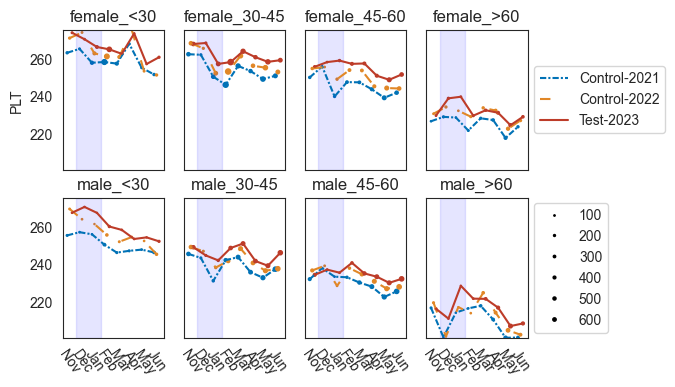

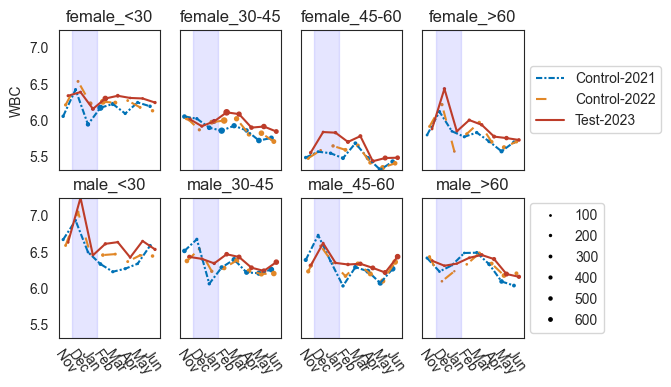

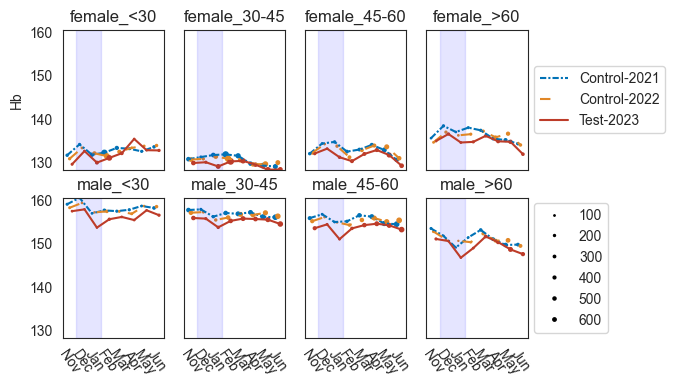

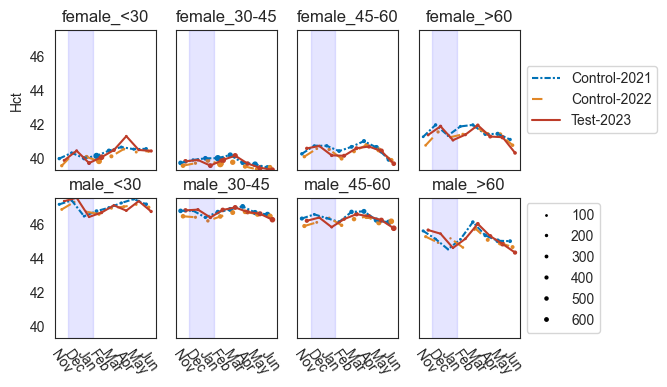

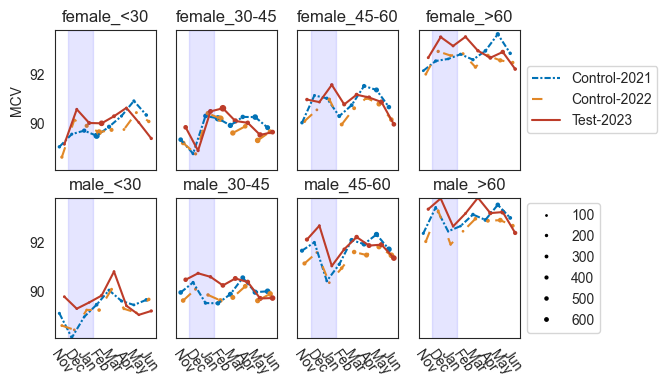

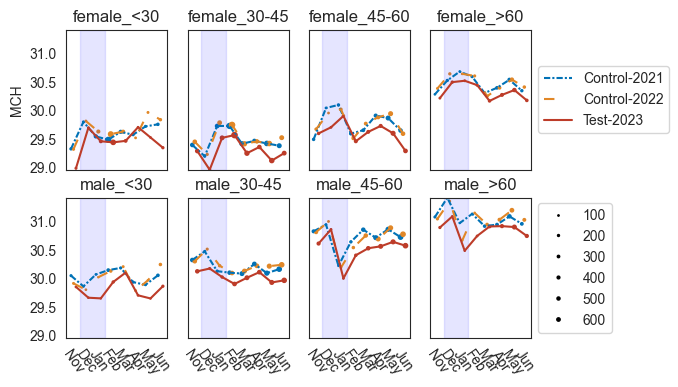

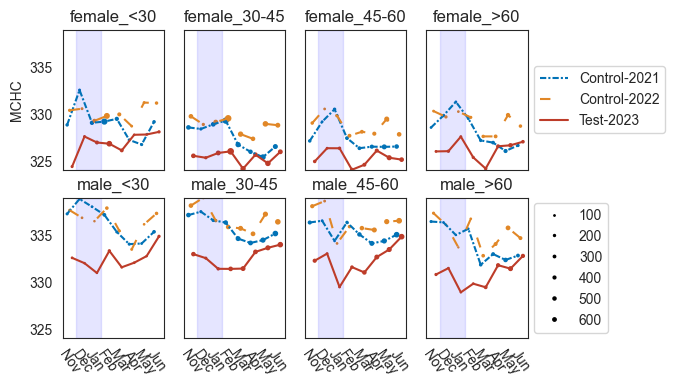

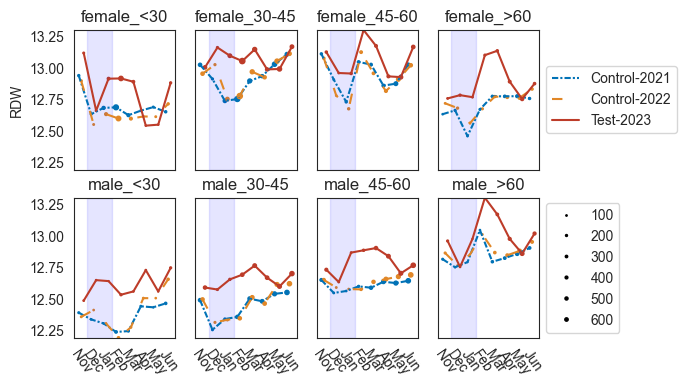

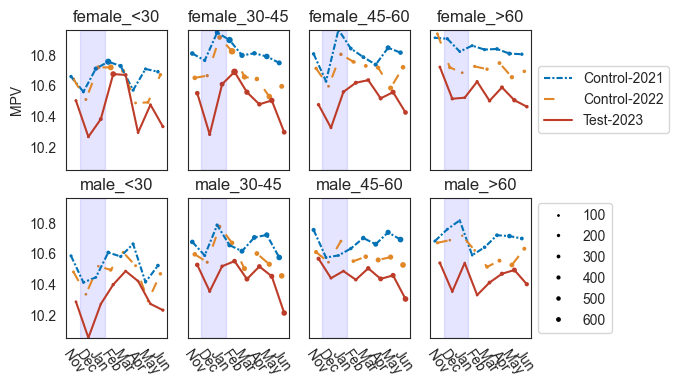

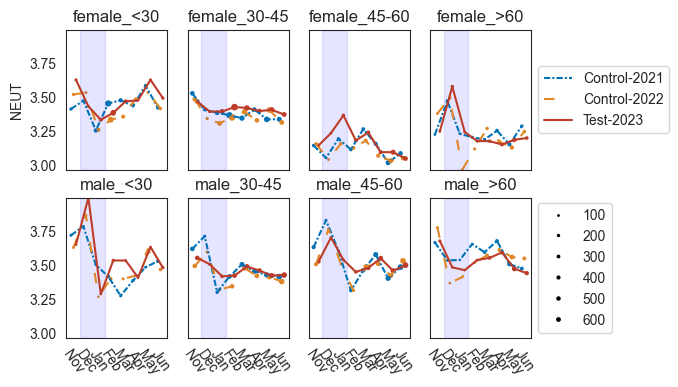

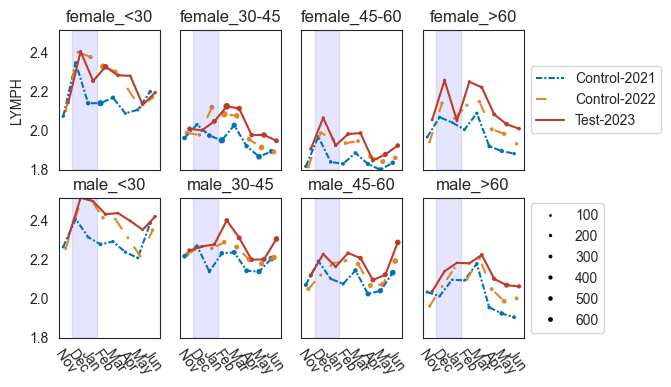

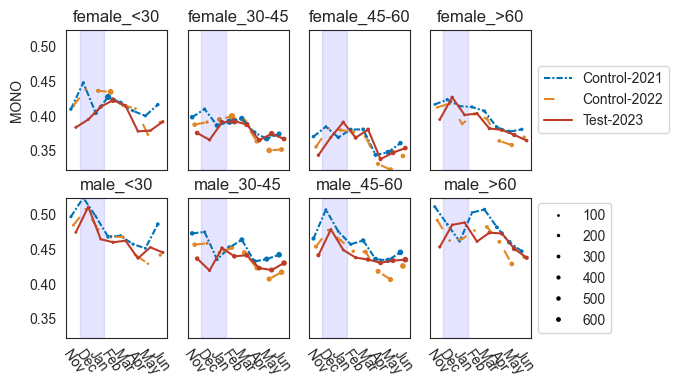

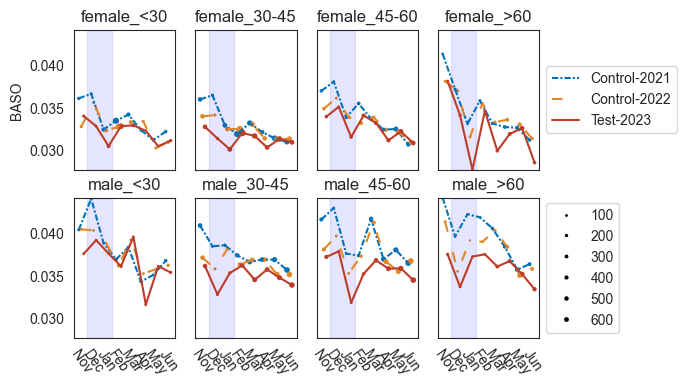

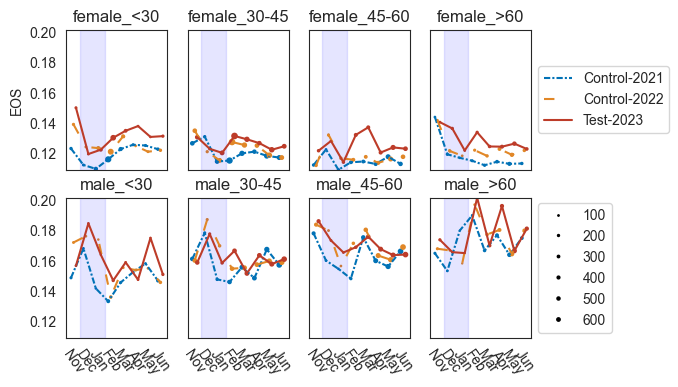

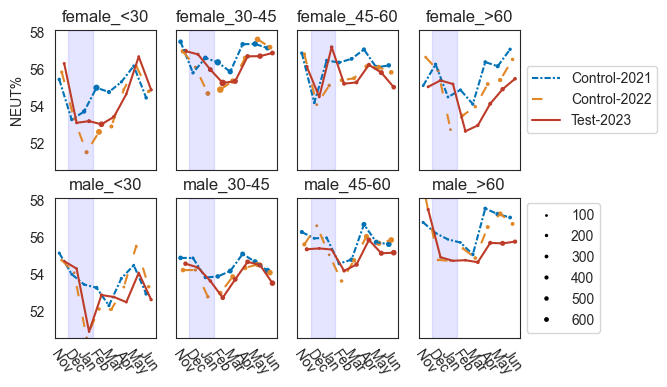

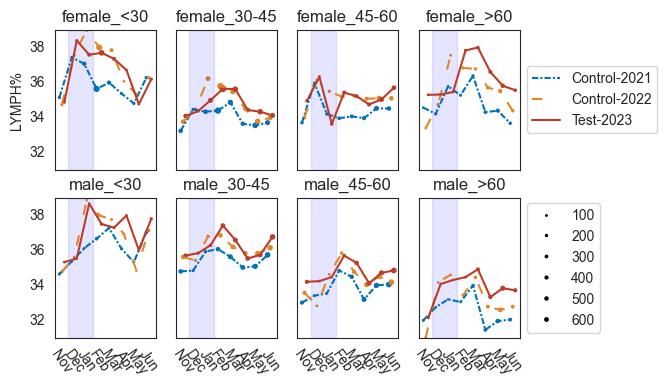

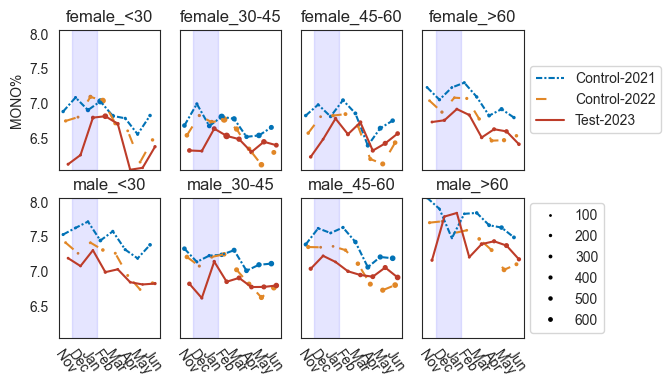

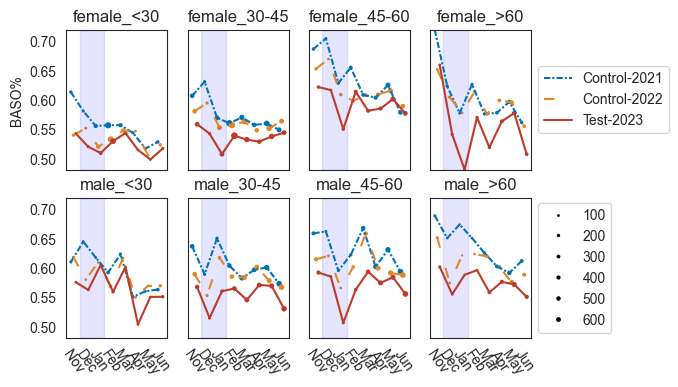

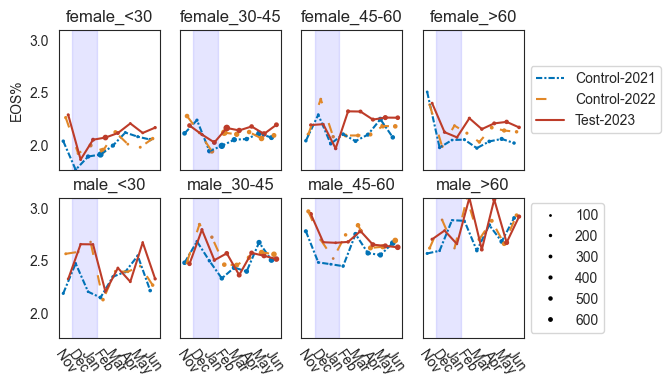

In [18]:
for tag in l_tags:
    plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
    fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)


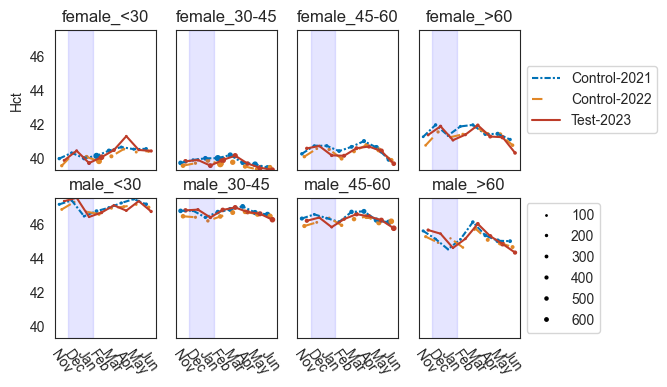

In [19]:
tag = "v9059"
plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)


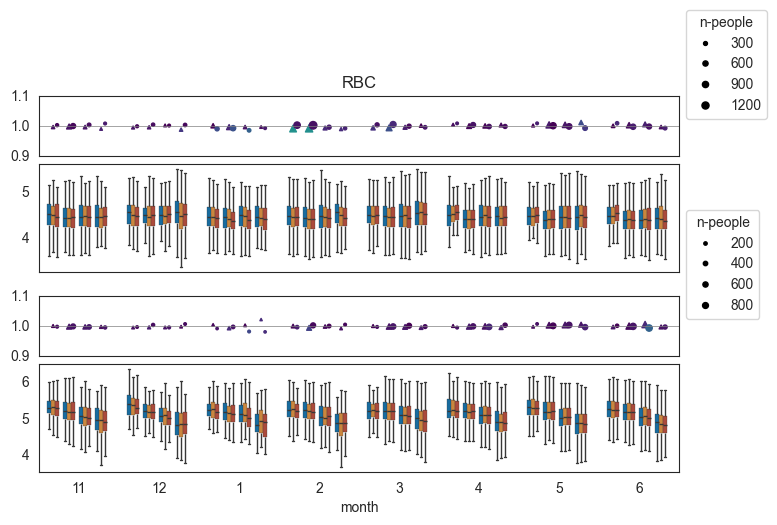

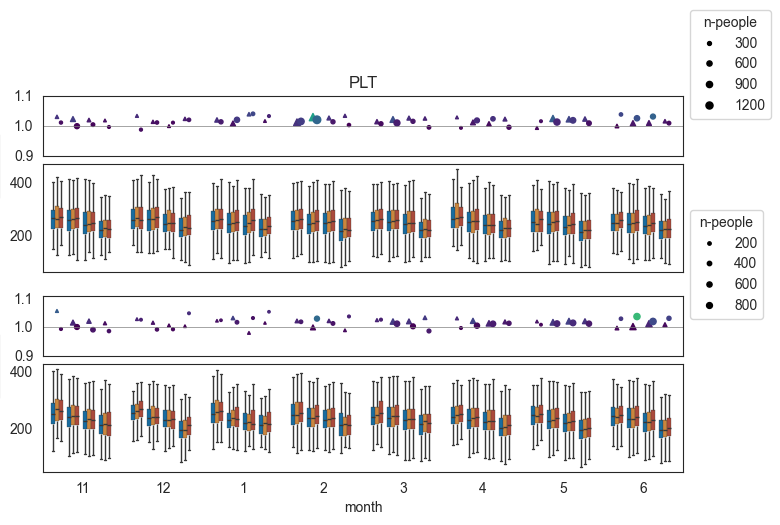

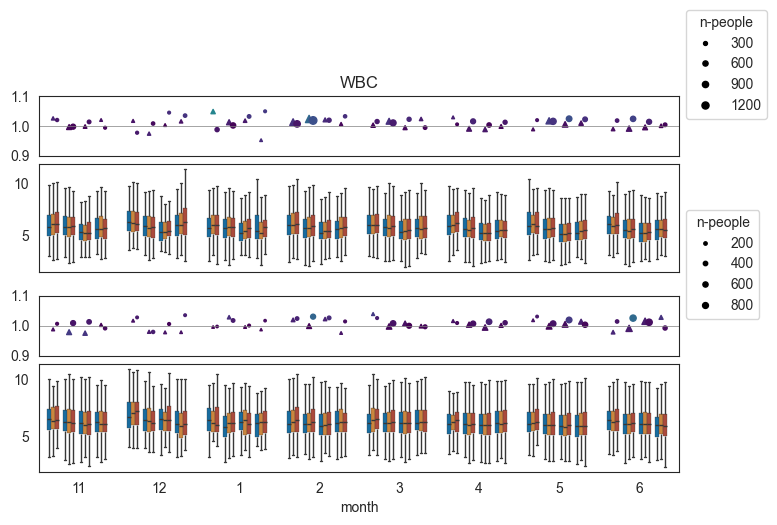

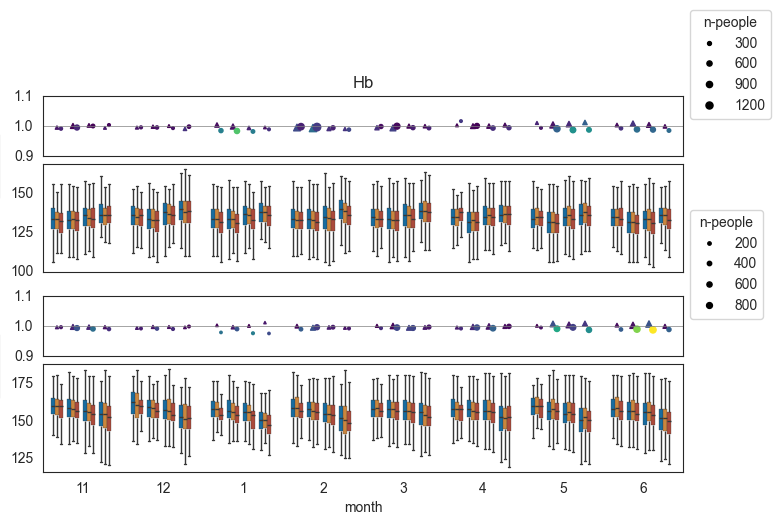

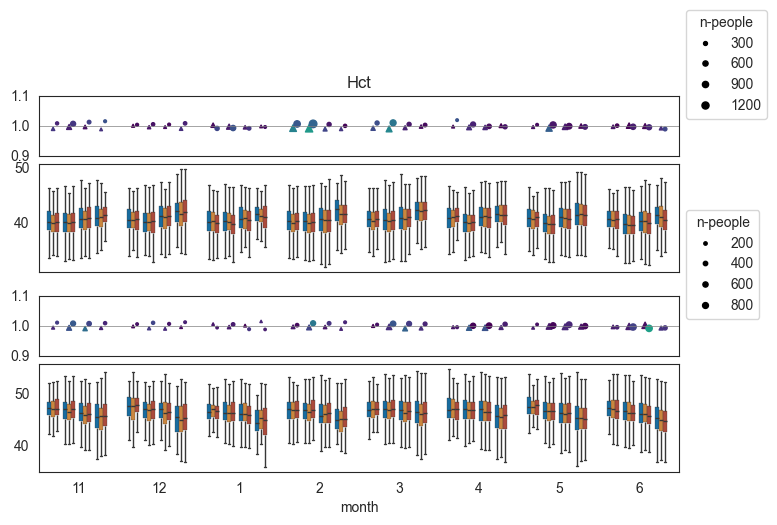

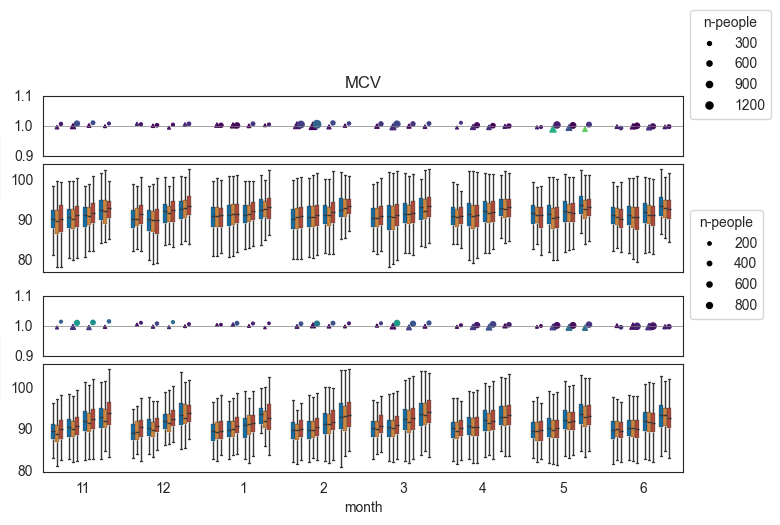

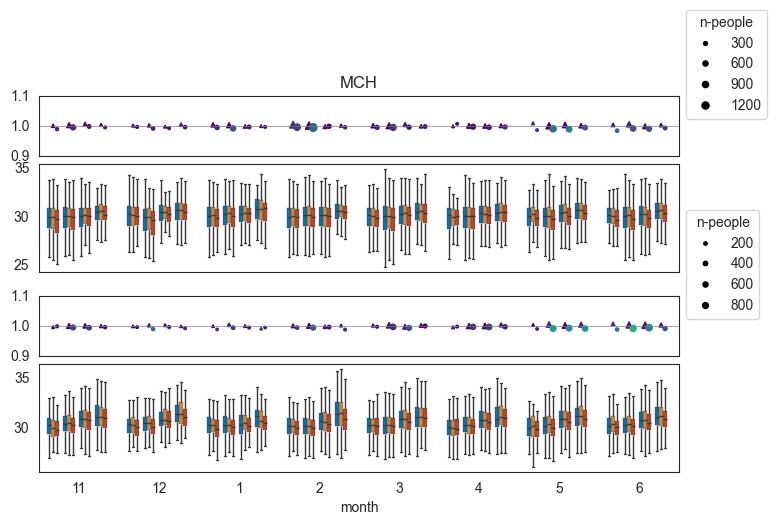

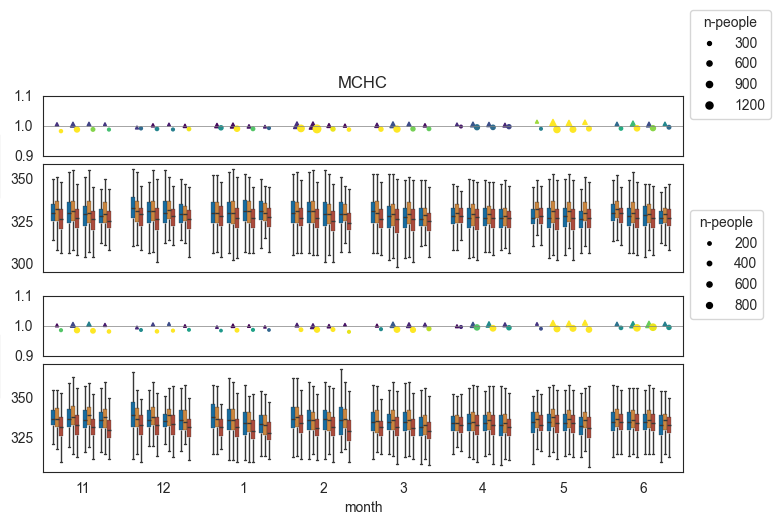

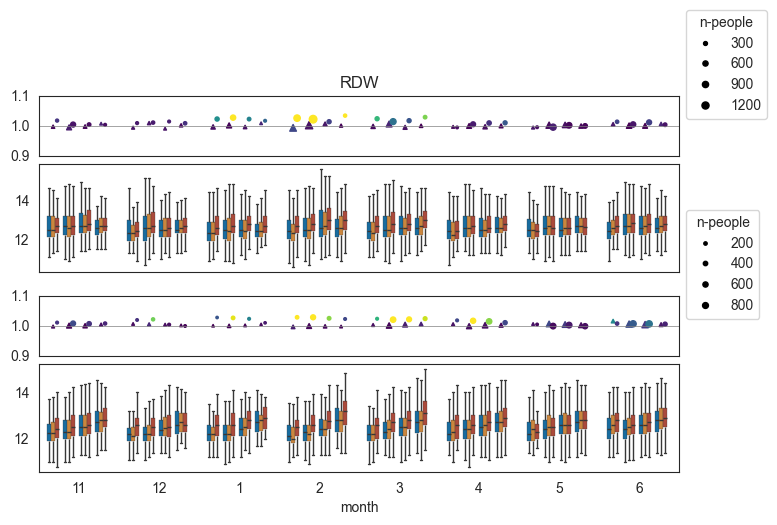

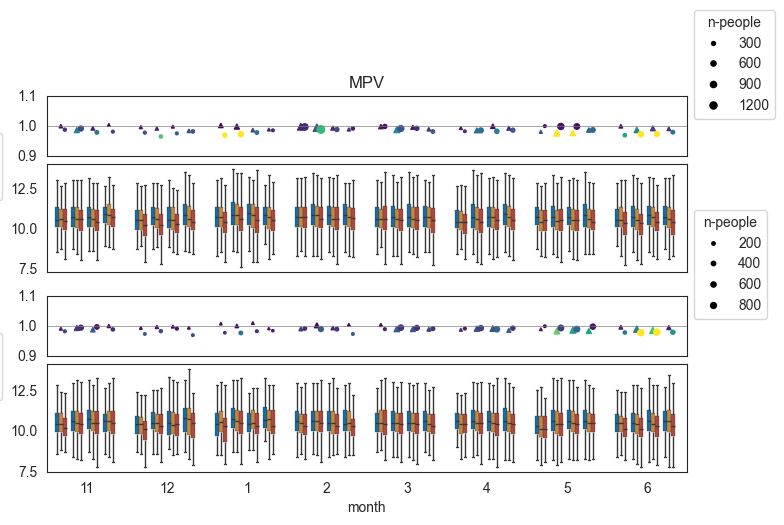

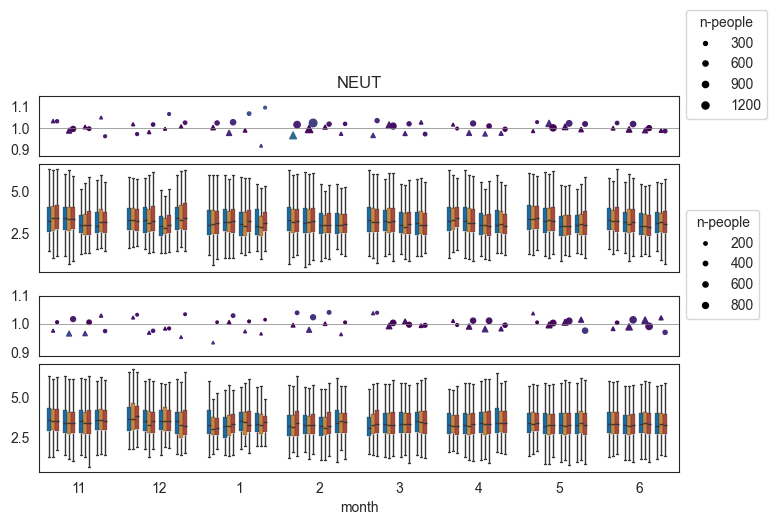

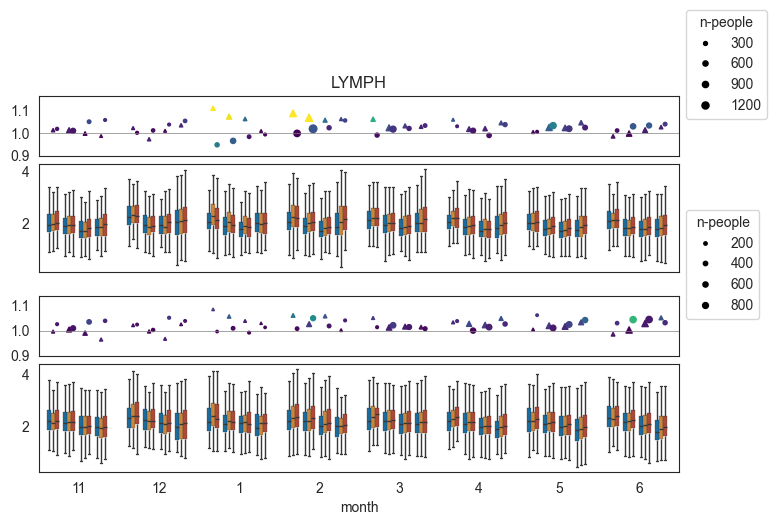

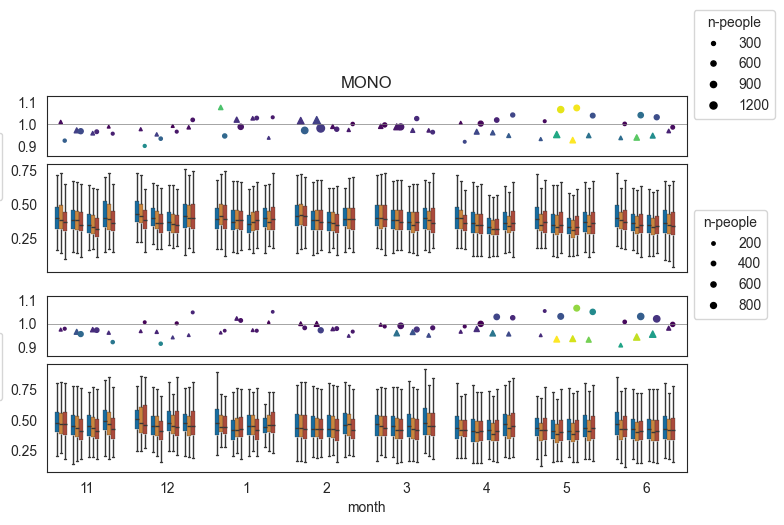

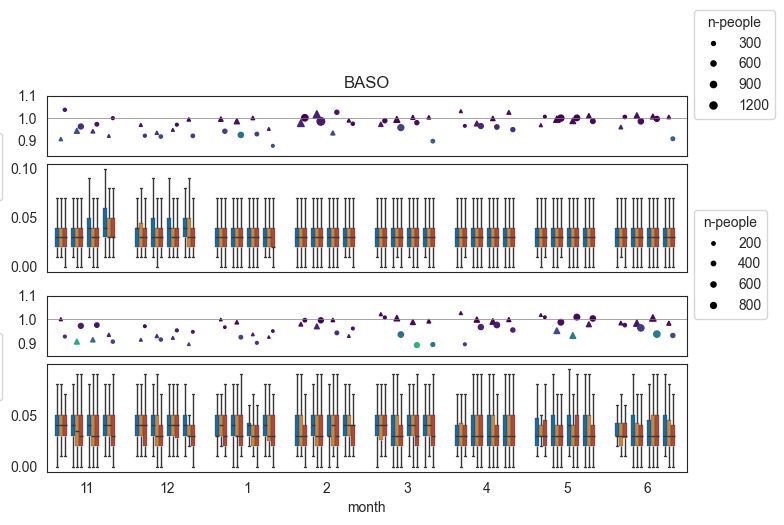

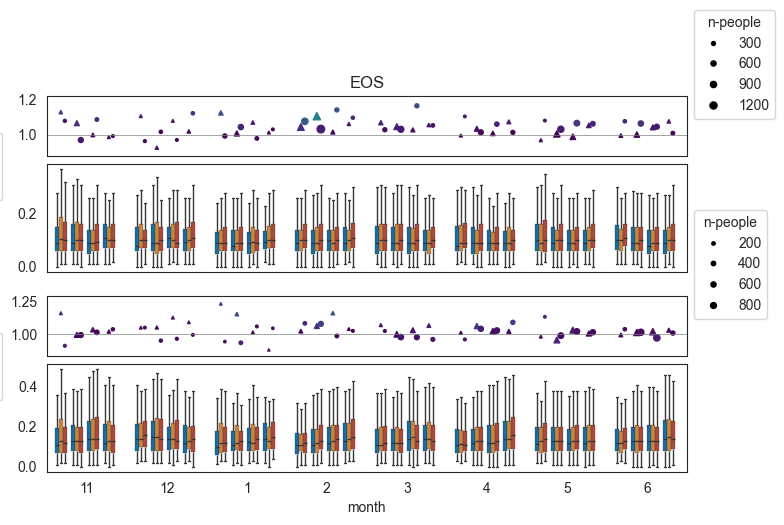

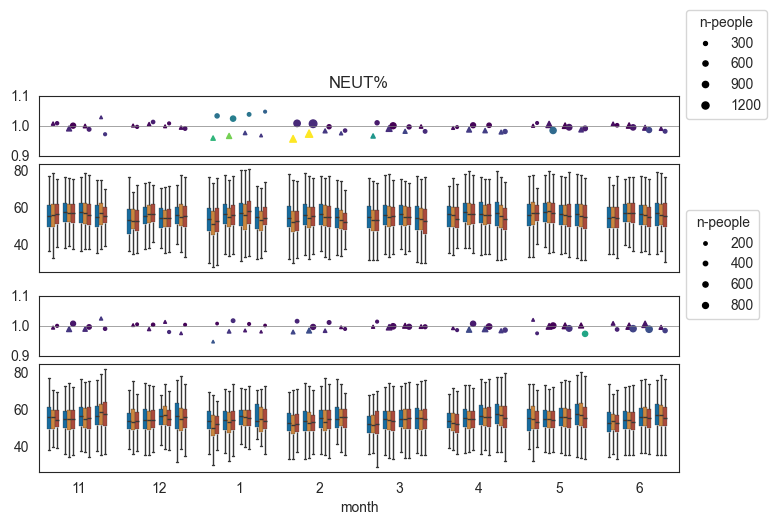

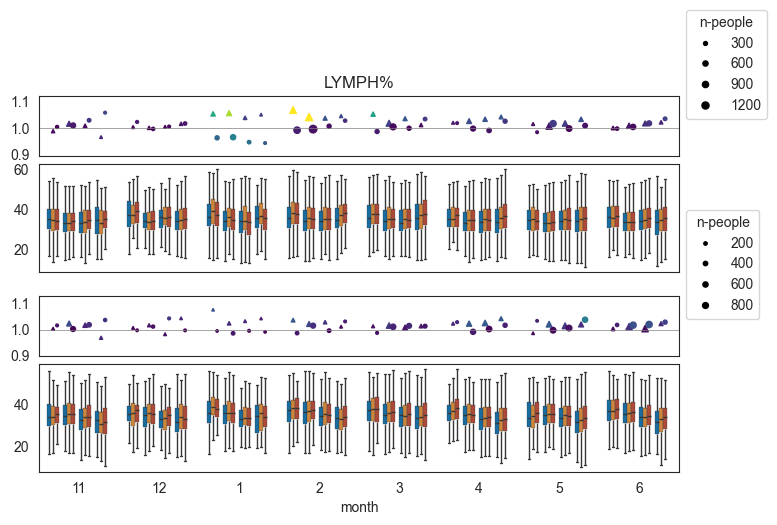

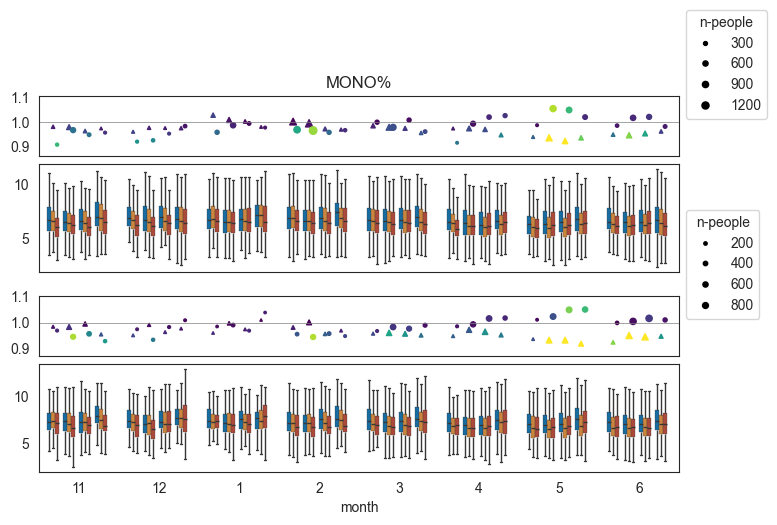

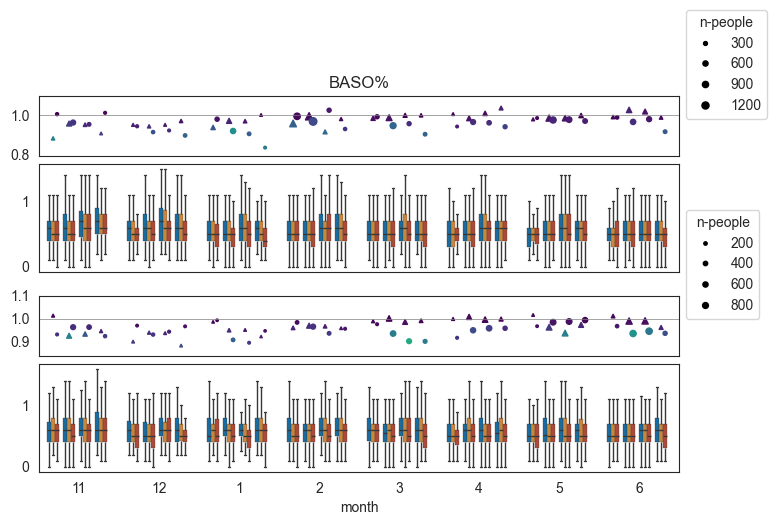

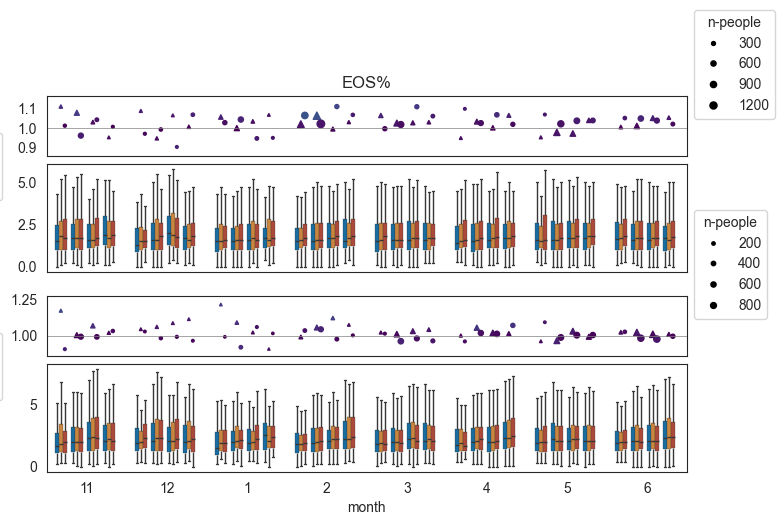

In [20]:
for tag in l_tags:
    fig, _ = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="boxplot"
    )

In [21]:
# Ty

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.71it/s]


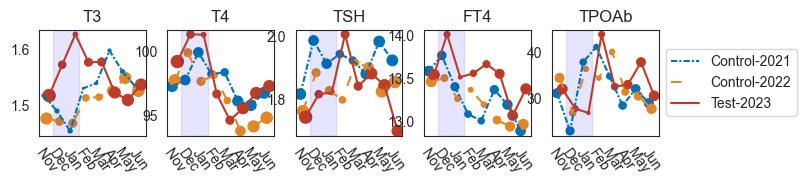

In [22]:

l_tags = [
    'v9453', 'v0955', 'v9461', 'v9462', 'v9464',
]
l_months = [11,12,1,2,3,4,5,6]

plt_scatter = Scatter(n_cols=5, figsize=(8,8), n_rows=5, rename_dict=rename_dict)
fig, df_res_all = plt_scatter.plot_scatter(df_table1plus, l_tags, order=l_months)
fig.savefig(f"{workdir}/Figure2_C.pdf")

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.90it/s]


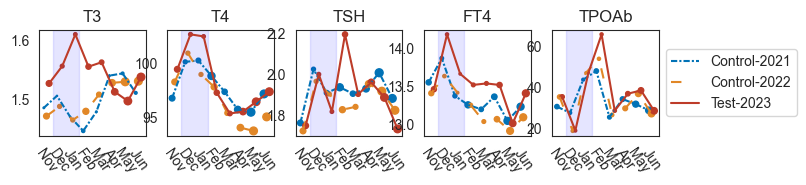

In [23]:

l_tags = [
    'v9453', 'v0955', 'v9461', 'v9462', 'v9464',
]
l_months = [11,12,1,2,3,4,5,6]

plt_scatter = Scatter(n_cols=5, figsize=(8,8), n_rows=5, rename_dict=rename_dict)
fig, df_res_all = plt_scatter.plot_scatter(df_table1plus_3p_revMM, l_tags, order=l_months)
fig.savefig(f"{workdir}/.Figure2_C-3y.pdf")